# Grade: /100 points

# Assignment 01: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

We will examine a data set containing 200 observations. The data set has 3 variables:

1. $y$: the outcome of interest.
2. $x1$: first predictor.
3. $x2$: second predictor.

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [299]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
from google.colab import drive
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

#Mounting the google drive

%matplotlib inline

#### Before you start...

Recall that L1 loss function (sum of magnitudes, used for LAD model):

$$L_1(\theta) = \sum_{i=1}^{n} \lvert {y_i-\hat{y_i}} \rvert$$

L2 loss function (RSS, residual sum of squares, used for OLS model):

$$L_2(\theta) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^2$$


## Part 1
### Question 1.1:  /10 points


Read the `my_dataset.csv` file as a `pandas.DataFrame` and (1) change column names $x1$ and $x2$ to pred_1 and pred_2, respectively (2) print the first 10 rows. Remove the 5th observation since its pred_1 value is an outlier. Using the resulted data set from the previous step, for the 5th observation replace its pred_1 value (i.e., NAN) with 9.5. Print the first 10 rows of the final data set. Plot a scatterplot for every pairwise combination (scatterplot matrix), and briefly discuss the relationships between the variables. Based on your findings, discuss whether a simple linear regression is appropriate here or not.

           y  pred_1  pred_2
0  25.265621     3.6     3.1
1  63.512826     8.1     9.7
2  25.441710     4.7     6.4
3  79.286388     9.0     5.6
4  36.271320   100.0     5.2
5  86.271320     NaN     4.6
6   3.015506     1.4     9.0
7  36.834794     5.8     4.3
8  80.558765     9.1     3.6
9  45.601815     6.0     2.5
           y  pred_1  pred_2
0  25.265621     3.6     3.1
1  63.512826     8.1     9.7
2  25.441710     4.7     6.4
3  79.286388     9.0     5.6
4  86.271320     9.5     4.6
5   3.015506     1.4     9.0
6  36.834794     5.8     4.3
7  80.558765     9.1     3.6
8  45.601815     6.0     2.5
9  33.299944     5.1     2.5


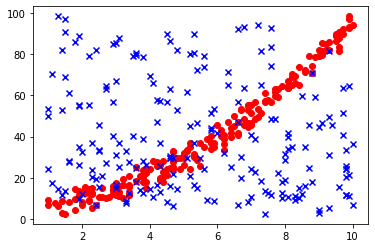

In [300]:
from pandas.io.pytables import IndexCol
# Your code here.


my_DF = pd.read_csv('/content/my_dataset.csv')
newColName = {'x1': 'pred_1', 'x2': 'pred_2'}
my_DF = my_DF.rename(columns=newColName)
print(my_DF[0:10])
my_DF = my_DF.drop(index = 4).reset_index(drop=True)
my_DF.at[4,'pred_1'] = 9.5
print(my_DF[0:10])
plt.scatter(my_DF['pred_1'], my_DF['y'], color='r', marker='o')
plt.scatter(my_DF['pred_2'], my_DF['y'], color='b', marker='x')
plt.show()




**Written answer: What do you see here? Discuss your findings**

I dont believe a simple linear regression would work here for both data point. With pred_1 it might work but it's not reccomended as it seems more like an exponential function, while with pred_2 has no semblance to a linear regression, however pred_1 does seem to divide pred_2 into 2 sides loosely, so classification might work for it. Therefore neither really fit the criteria for a linear regression.

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```

Call your function using these values. 

Report $\hat{\mathbf{y}}$. 

What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [236]:

# Your code here.
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
def linearModelPredict(arr, matrix):
    return arr@matrix
print(linearModelPredict(X,b))

[ 0.1 -0.2  0.7]


The dimensionality of the array is 1.

### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
b = np.array([0.1,0.3,0.85])
y = np.array([1.3,0.3,2]) 
```

Report the loss and the gradient. 


In [237]:
# Your code here.
X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
b = np.array([0.1,0.3,0.1])
y = np.array([1.3,0.3,2]) 
def linearModelLossRSS(b,X,y):
  predY = linearModelPredict(X,b)
  res = (y-predY)
  rss = np.sum(np.square(res))
  gradient = (-2*X.T@res)
  return (rss, gradient)

print(linearModelLossRSS(b,X,y))



(2.4074999999999998, array([-5.1 , -3.3 , -8.85]))


**Written answer**: To minimize the loss, do you need increase or decrease the value of the parameters? 

You want to decrease the parameters as this will reduce the loss by making the product of the square sum of coffecient smaller. However it wont reduce to zero, and will find a balance with the RSS to produce a the smallest loss it can.


### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the $R^2$. 

Test the function with the values: 
```
X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
y = np.array([1.3,0.3,2])
```

Report best parameters and the fitted $R^2$ 


In [301]:
# Your code here.
import scipy.optimize as so

X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
y = np.array([1.3,0.3,2])


def linearModelFit(X, y, lossfcn):
  bstart = np.zeros(X.shape[-1])
  Results = so.minimize(lossfcn,bstart,args = (X,y),jac = True)
  loss = lossfcn(Results.x,X,y)
  tss = np.sum(np.square(y - (np.mean(y))))
  cod = 1- (loss[0]/tss)
  return Results.x,cod;

linearModelFit(X,y, linearModelLossRSS)


(array([-0.65000159, -0.30000055,  1.30000129]), 0.9999999999996051)

best param  = [-0.65000159, -0.30000055,  1.30000129] R = 0.9999999999996051

### Question 1.5: /15 points

Use the above functions to fit your model to the my_data. Use $y$ as the target variable and pred_1 as the predictor. Then use your model and the fitted parameters to make predictions along a grid of equally spaced values for the pred_1 variable. Note that, these new values must be within the original range of the pred_1 variable.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with 100 equally spaced values (using for example [```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Also report the $R^2$ value for the fit. You can do this by either printing out the $R^2$ of the fit or putting it on your plot via the `annotate` function in matplotlib.


(array([7.67964983]), 0.8803265016534647)

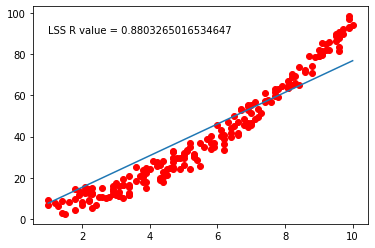

In [302]:
# Your code here.

y = my_DF['y'].values
predX = np.linspace(1,10,num = 100).reshape(-1,1)
X = my_DF['pred_1'].values.reshape(-1,1)
params = linearModelFit(X, y, linearModelLossRSS)
LSSR = params[1]
LSSpredY = linearModelPredict(predX, params[0])
plt.plot(X,y,'ro')
plt.plot(predX,LSSpredY)
plt.annotate(("LSS R value = " + str(params[1])),(1,90))
plt.show
params


## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
b = np.array([0.1,0.3,0.85])
y = np.array([1.3,0.3,2]) 
```

Report the loss and the gradient. 

In [305]:
# Your code here.
X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
b = np.array([0.1,0.3,0.85])
y = np.array([1.3,0.3,2])

def linearModelLossLAD(b, X, y):
  yPred = linearModelPredict(X,b)
  res = np.absolute(y - yPred)
  LAD = np.sum(res)
  grad = -2*X.T@res
  return LAD, grad;

linearModelLossLAD(b,X,y)




(0.9750000000000001, array([-1.95 , -3.15 , -4.425]))

loss = 0.975 and gradient = [-1.95 , -3.15 , -4.425]

### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of 100 equally spaced values for pred_1.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the $R^2$-value. 

**Written answer**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? How their $R^2$ values compare? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



Text(1, 80, 'LAD R value = 0.9883524572110846')

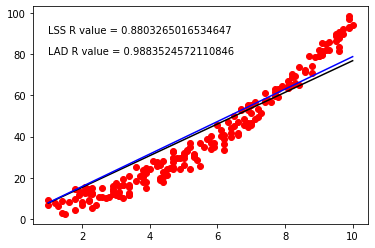

In [306]:
# Your code here
y = my_DF['y'].values
X = my_DF['pred_1'].values.reshape(-1,1)
params = linearModelFit(X, y, linearModelLossLAD)
predY = linearModelPredict(predX, params[0])
plt.plot(X,y,'ro')
plt.plot(predX,LSSpredY, color = 'black')

plt.annotate(("LSS R value = " + str(LSSR)),(1,90))
plt.plot(predX,predY, color = 'blue')
plt.annotate(("LAD R value = " + str(params[1])),(1,80))


Written answer: Your answer here.

The difference is relatively low in terms of loss with there being a difference of less than 0.1 in value with L1 being higher. While the r is very different with L1 having a significantly higher value (in context) of over 0.1. this makes sense as the outliers were removed from the data making it so that L1 is more accurate with the test data. This also makes sense as there is only one feature being measure making the L1 less succeptible to making the model sparse and overfitting the test data.

### Question 2.3: /15 points

Now we will use all data for the fit. Fit an OLS model to the my_data with the `linear_model` module from the `sklearn` package by using the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class.  In no more than two sentences, comment on the $R^2$ values from `sklearn` and the $R^2$ values from your models. Are they similar?

In [298]:
# Your code here
y = my_DF['y'].values
predX = np.linspace(1,10,num = 200).reshape(-1,1)
X = my_DF['pred_1'].values.reshape(-1,1)
model = linear_model.LinearRegression().fit(X,y)
predY = model.predict(predX)
model.score(X,y)


0.9484570099594501

Written answer: Your answer here.

The score is similar to the ones achieved its inbetween both almost in the middle. it seems not to overfit it like L1